# RSNA - Exploratory Data Analysis Part 1


In this notebook, we are going to take a look at the csv file. Usually, the csv file accompanying a training dataset would provide us with the <b>ground truth</b> of each sample (in this case, the <b>diagonsis of each CT scan image</b> assessed by a radiologist). Sometimes, it may also have other useful information, for example, the age and gender of each patient. 

We will rearrange the information into a more easy-to-read format, inspect the data distribution and look for any oddity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_file="stage_1_train.csv"

In [3]:
raw_data_table = pd.read_csv(data_file)

# 1. A first look at the data

In [4]:
raw_data_table[0:20]

,ID,Label
0,ID_63eb1e259_epidural,0
1,ID_63eb1e259_intraparenchymal,0
2,ID_63eb1e259_intraventricular,0
3,ID_63eb1e259_subarachnoid,0
4,ID_63eb1e259_subdural,0
5,ID_63eb1e259_any,0
6,ID_2669954a7_epidural,0
7,ID_2669954a7_intraparenchymal,0
8,ID_2669954a7_intraventricular,0
9,ID_2669954a7_subarachnoid,0


#### Remark: each row indicates if a patient (identified by id) has a particular type of hemorrhage (if so, Label = 1, otherwise, Label = 0)

In [5]:
#let's check if there are rows with duplicated ID
duplicated_rows = raw_data_table[raw_data_table.duplicated(subset = 'ID')]
num_duplicated = len(duplicated_rows)
len(duplicated_rows)

24

In [6]:
#Inspect the rows with duplicated ID and check if there is any inconsistency
for index, row in duplicated_rows.iterrows():
    ID = row['ID']
    print(raw_data_table[raw_data_table['ID'] == ID])

                           ID  Label
312468  ID_a64d5deed_epidural      0
312474  ID_a64d5deed_epidural      0
                                   ID  Label
312469  ID_a64d5deed_intraparenchymal      0
312475  ID_a64d5deed_intraparenchymal      0
                                   ID  Label
312470  ID_a64d5deed_intraventricular      0
312476  ID_a64d5deed_intraventricular      0
                               ID  Label
312471  ID_a64d5deed_subarachnoid      0
312477  ID_a64d5deed_subarachnoid      0
                           ID  Label
312472  ID_a64d5deed_subdural      0
312478  ID_a64d5deed_subdural      0
                      ID  Label
312473  ID_a64d5deed_any      0
312479  ID_a64d5deed_any      0
                            ID  Label
1598538  ID_921490062_epidural      0
1598544  ID_921490062_epidural      0
                                    ID  Label
1598539  ID_921490062_intraparenchymal      0
1598545  ID_921490062_intraparenchymal      0
                                    I

#### Observation: some rows have duplicated IDs, but their labels are the same. We can therefore ignore them as they will be eliminated after rearranging the table in the next step.

In [7]:
raw_data_table['Label'].value_counts()

0    3814760
1     230812
Name: Label, dtype: int64

#### Remark: Label can only be 0 or 1

# 2. Rearrange the table to a simpler format

In [8]:
columns = ['ID', 'Label', 'case id', 'epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural', 'any', 'error']

In [9]:
data_table = pd.DataFrame(columns = columns)

data_table['ID'] = raw_data_table['ID']
data_table['Label'] = raw_data_table['Label']
data_table = data_table.fillna(0)

In [10]:
def group_by_case_id(df):
    id_parts = df['ID'].split('_')
    
    df['case id'] = id_parts[1]
    
    if id_parts[2] == 'epidural':
        df['epidural'] = df['Label']   
    elif id_parts[2] == 'intraparenchymal':
        df['intraparenchymal'] = df['Label']
    elif id_parts[2] == 'intraventricular':
        df['intraventricular'] = df['Label']
    elif id_parts[2] == 'subarachnoid' :
        df['subarachnoid'] = df['Label']
    elif id_parts[2] == 'subdural':
        df['subdural'] = df['Label']    
    elif id_parts[2] == 'any':
        df['any'] = df['Label']
    else:#something weird happened, add to error count for that case
        df['error'] = df['error']+1
    return df

In [11]:
data_table = data_table.apply(lambda x: group_by_case_id(x), axis=1)

In [12]:
data_table = data_table.drop(['ID', 'Label'],axis = 1)
data_table = data_table.groupby('case id').sum()

# 3. Ensure correctness of the new table

In [13]:
data_table.head()

,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any,error
case id,,,,,,,
000039fa0,0,0,0,0,0,0,0
00005679d,0,0,0,0,0,0,0
00008ce3c,0,0,0,0,0,0,0
0000950d7,0,0,0,0,0,0,0
0000aee4b,0,0,0,0,0,0,0


In [14]:
#Check if the table was converted correctly, each six rows in the original table is combined to a single row indexed by the case id
(len(raw_data_table)-num_duplicated)/len(data_table)

6.0

#### Observation: looks correct!

### If the table was parsed correctly, each type of hemorrhage should have a value of 0 or 1. Let's make sure of that.

In [15]:
data_table['epidural'].value_counts()

0    671497
1      2761
Name: epidural, dtype: int64

In [16]:
data_table['intraparenchymal'].value_counts()

0    641694
1     32564
Name: intraparenchymal, dtype: int64

In [17]:
data_table['intraventricular'].value_counts()

0    650492
1     23766
Name: intraventricular, dtype: int64

In [18]:
data_table['subarachnoid'].value_counts()

0    642136
1     32122
Name: subarachnoid, dtype: int64

In [19]:
data_table['subdural'].value_counts()

0    631762
1     42496
Name: subdural, dtype: int64

In [20]:
data_table['any'].value_counts()

0    577155
1     97103
Name: any, dtype: int64

#### observation: look correct!

In [21]:
data_table['error'].value_counts()

0    674258
Name: error, dtype: int64

In [22]:
#There is no error, we can drop the error column
data_table = data_table.drop(columns = ['error'])

### Let's look at some specific cases to further ensure the correctness of the table

In [23]:
data_table[data_table['intraparenchymal']==1][0:10]

,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any
case id,,,,,,
0002081b6,0,1,0,0,0,1
00083d407,0,1,0,0,0,1
00094b19b,0,1,0,1,0,1
0009e5f5e,0,1,0,0,0,1
000d69988,0,1,0,1,0,1
000ec5e66,0,1,0,0,1,1
00101d495,0,1,0,0,0,1
001212532,0,1,1,0,0,1
0012b5d89,0,1,1,0,1,1


In [24]:
raw_data_table[raw_data_table['ID'].apply(lambda x: "000d69988" in x)]

,ID,Label
1423152,ID_000d69988_epidural,0
1423153,ID_000d69988_intraparenchymal,1
1423154,ID_000d69988_intraventricular,0
1423155,ID_000d69988_subarachnoid,1
1423156,ID_000d69988_subdural,0
1423157,ID_000d69988_any,1


In [25]:
raw_data_table[raw_data_table['ID'].apply(lambda x: "0012b5d89" in x)]

,ID,Label
1611144,ID_0012b5d89_epidural,0
1611145,ID_0012b5d89_intraparenchymal,1
1611146,ID_0012b5d89_intraventricular,1
1611147,ID_0012b5d89_subarachnoid,0
1611148,ID_0012b5d89_subdural,1
1611149,ID_0012b5d89_any,1


#### Observation: looks like the raw data table was parsed correctly

# 4. Take a look at the data distribution

In [26]:
diagnosis = ['epidural', 'intraparenchymal', 'intraventricular','subarachnoid', 'subdural','any']

In [27]:
diagnosis_count = [data_table[x].sum() for x in diagnosis]

Text(0.5, 1.0, 'Number of images vs Diagnosis')

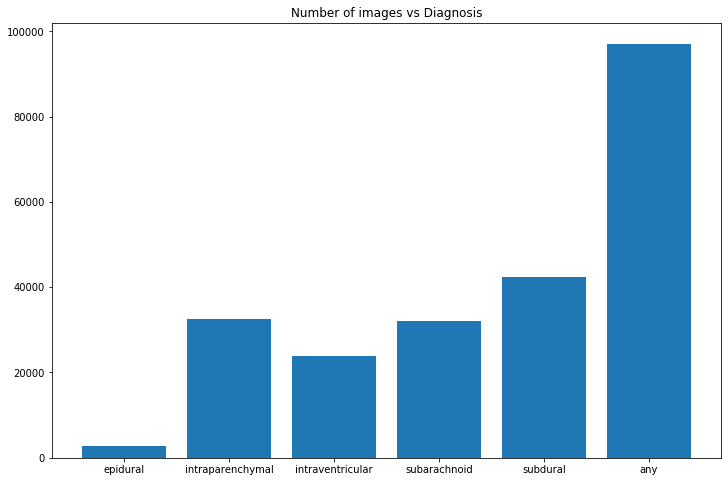

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(diagnosis, diagnosis_count)
ax.set_title('Number of images vs Diagnosis')

#### Observation: some images are assigned with multiple diagnoses

## Take a look at the correlations among the diagnoses

In [29]:
for i, diagnosis_x in enumerate(diagnosis[0:4]):
    for diagnosis_y in diagnosis[i+1:5]:
    
        corr = np.corrcoef(data_table[diagnosis_x], data_table[diagnosis_y])
        print('Correlation between '+diagnosis_x +" and "+diagnosis_y)
        print(corr) 
        

Correlation between epidural and intraparenchymal
[[1.         0.04578504]
 [0.04578504 1.        ]]
Correlation between epidural and intraventricular
[[1.       0.014947]
 [0.014947 1.      ]]
Correlation between epidural and subarachnoid
[[1.        0.0384301]
 [0.0384301 1.       ]]
Correlation between epidural and subdural
[[1.         0.04501182]
 [0.04501182 1.        ]]
Correlation between intraparenchymal and intraventricular
[[1.         0.31767652]
 [0.31767652 1.        ]]
Correlation between intraparenchymal and subarachnoid
[[1.        0.2198587]
 [0.2198587 1.       ]]
Correlation between intraparenchymal and subdural
[[1.         0.12777751]
 [0.12777751 1.        ]]
Correlation between intraventricular and subarachnoid
[[1.        0.2115512]
 [0.2115512 1.       ]]
Correlation between intraventricular and subdural
[[1.         0.06308495]
 [0.06308495 1.        ]]
Correlation between subarachnoid and subdural
[[1.         0.18568078]
 [0.18568078 1.        ]]


#### Observations:
#### Epidural has insignifcant correlations with other types.
#### Subdural also has relatively small correlations with other types.
#### Intraparenchymal and intraventricular have the strongest correlation with each other
#### Both intraparenchymal and intraventricular have a moderate relation with subarachnoid

## Take a look at the data with multiple diagnoses

In [30]:
diagnosis = ['epidural', 'intraparenchymal', 'intraventricular','subarachnoid', 'subdural']

In [31]:
def count_labels(df):
    df['count'] = df[diagnosis].sum()
    return df

In [32]:
data_table=data_table.apply(lambda x: count_labels(x), axis=1)

In [33]:
data_table['count'].value_counts()

0    577155
1     67969
2     22587
3      5642
4       885
5        20
Name: count, dtype: int64

#### Observation: most images are assessed as normal/healthy and has no types of hemorrhage assigned to it. Among the images that are assigned with a hemorrhage, the majority has only one type, and a significant portion has two types

In [34]:
#Check if any image has one or more types of hemorrhage but 'any' is marked as zero
has_diagnosis = data_table['count']>0
any_diagnosis = data_table['any'] == 1

len(data_table[has_diagnosis & ~any_diagnosis])

0

In [35]:
#Check if any image has no hemorrhage but 'any' is marked as one
has_diagnosis = data_table['count'] == 0
any_diagnosis = data_table['any'] == 1

len(data_table[has_diagnosis & any_diagnosis])

0

#### Observation: the column "any" correctly indicates if the image is identified with one or more types of hemorrhage

In [36]:
#Save the data table into a file
data_table.to_pickle('rsna_data_table.pkl') 